# Premier League Dataset Explanatory
## by Omar Farouk

## Investigation Overview

 
> The football matches are unpredictable, could we have any chance to know what can affect the results of the matches?<br>
We will investigate about some match stats as:
- Does playing at home stadium gives you more advantage on the other team?
- Does number of shots and passes affect the results?}
> We will see some visualizations which may answer these questions.


## Dataset Overview

> Provide a brief overview of the dataset to be presented here.
> The dataset is about Premier League from season 2011/12 to season 2019/20,it contains 3327 matches. The dataset is about stats of the matches like passes, shots, possession, attendance.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_base = pd.read_csv('datasets/pl_clean_base.csv')
df_mod = pd.read_csv('datasets/pl_clean_modified.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## Wins rate to Home teams and Away teams.

> The win rate for the home team is 45.5% and the win rate for the away team is 24.2%, the rest is about tie between both teams (30.3%). it is abvoius that the Home team has higher probability than the Away team to win the match at home stadium.

In [5]:
res_counts = df_base.result.value_counts()
res_order = res_counts.index
n_res = res_counts.sum()


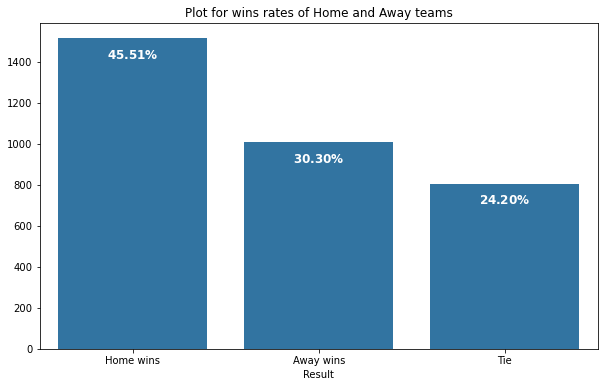

In [40]:
plt.figure(figsize=(10,6))
base_color = sb.color_palette()[0]

x_ticks_labels = ['Home wins', 'Away wins', 'Tie']
sb.countplot(data=df_base, x='result', order=res_order, color=base_color);
plt.xticks([0,1,2], x_ticks_labels);
plt.xlabel('Result')
plt.ylabel('')
plt.title('Plot for wins rates of Home and Away teams')

for i in range(res_counts.shape[0]):
    count = res_counts[i]
    p_str = r"$\bf{" + '{:.2f}'.format(count/n_res*100) + r"\%}$"
    plt.text(i,res_counts[i]-50, p_str, ha = 'center', va='top', color='white', fontsize=12)

## Distribution of scored goals

> The scored goals for a team in the match is begining with 0 and the maximum sored goals from a team in  match is 8 goals.<br>
The most of data is condensed from 0 to 2 goals in a match.

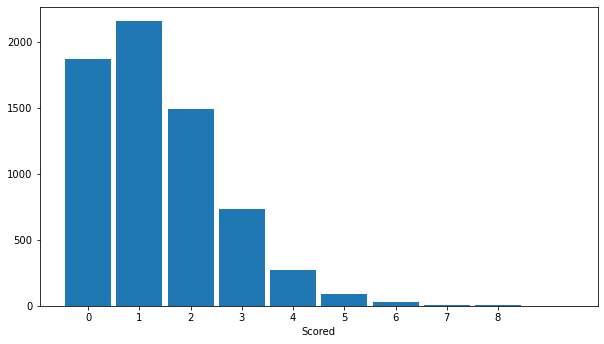

In [37]:
plt.figure(figsize=(10,5.5))
bins = np.arange(-0.5,9.5+1 , 1)
plt.hist(data=df_mod, x='scored', bins=bins, rwidth = 0.9);
plt.xticks(np.arange(0, 9, 1));
plt.xlabel('Scored');

## Scatter plot for Number of scored goals vs number of shots

> It is resonable for figure to desribe  the postive relation between them, when the team shots a large number of balls, he is having a great chance to score more goals. but you can shot large number of balls and dont score any of them.

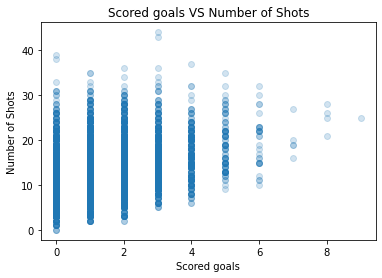

In [47]:
sb.regplot(data=df_mod, x='scored', y='shots', scatter_kws={"alpha":1/5},fit_reg=False);
plt.xlabel('Scored goals');
plt.ylabel('Number of Shots');
plt.title('Scored goals VS Number of Shots');

## Box plot between Results (Win , Tie, Lose) and Ball Possession

> Here, The teams with high possession on ball has higher chance to win the match, as we see the differnce between win and lose is small, so it is not a rule. sometimes the losing team has ball possesion higher than the winning team.

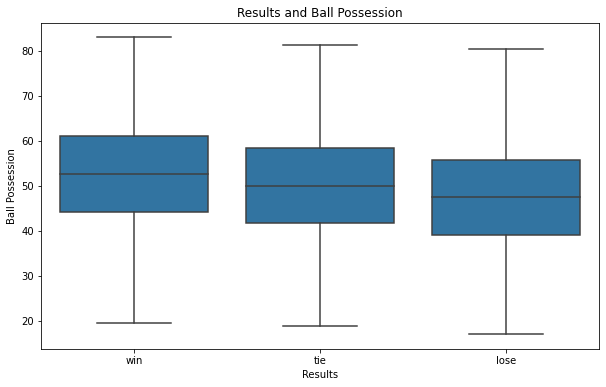

In [49]:
# boxplot between Result and possession
plt.figure(figsize=(10,6))
sb.boxplot(data=df_mod, y='posse', x='result', color=base_color);
plt.title('Results and Ball Possession')
plt.xlabel('Results')
plt.ylabel('Ball Possession');

## Number of passes vs Number of shots by the Result

> The figure descibes that the the team that has high number of shots and passes has higher chance to win the game.

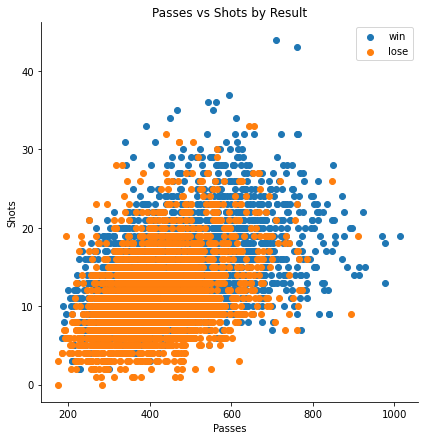

In [63]:
g = sb.FacetGrid(data=df_mod, hue='result', height=6,hue_order=['win', 'lose']);
g.map(plt.scatter, 'passes', 'shots');
plt.legend();
plt.title('Passes vs Shots by Result');
plt.xlabel('Passes');
plt.ylabel('Shots');

## Shots by Result and Team Hospitality

> it is obviuos that the winner of the team has average shots more than the losing team, whatever the winning team is playing at home or away.

In [68]:
order_dic = {'team_hospitality':['Home','Away'], 'result':['win','tie','lose']}

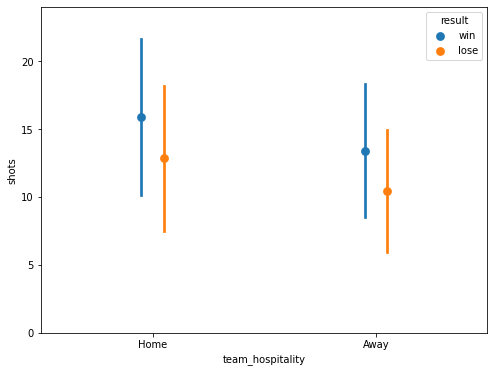

In [70]:
plt.figure(figsize=(8,6))
sb.pointplot(data = df_mod, x = 'team_hospitality', y = 'shots',order=order_dic['team_hospitality'],ci='sd',
           hue = 'result', hue_order=['win', 'lose'], linestyles = '', dodge=0.1)
plt.ylim((0,24));

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!